In [38]:
import pandas as pd

# Load the original dataset
original_data = pd.read_csv(r"C:\Users\User\Desktop\cleaned_critprop_data_with_all_info_expt.csv")
test_data = pd.read_csv(r"C:\Users\User\Desktop\test_smiles.csv")  # Load the test set data

# Find the corresponding actual values based on SMILES
test_actuals = original_data[original_data['smiles'].isin(test_data['smiles'])][["Tb mean (K)", "Tm mean (K)"]]



In [39]:
# Check the number of missing values in each column of test_actuals
print(test_actuals.isna().sum())  

Tb mean (K)     47
Tm mean (K)    270
dtype: int64


In [40]:
test_actuals = test_actuals.fillna(0)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the prediction results
predictions = pd.read_csv(r'C:\Users\User\Desktop\preds.csv')

# Calculate RMSE
rmse_tb = np.sqrt(mean_squared_error(test_actuals["Tb mean (K)"], predictions["Tb mean (K)"]))
rmse_tm = np.sqrt(mean_squared_error(test_actuals["Tm mean (K)"], predictions["Tm mean (K)"]))
print("Tb RMSE:", rmse_tb)
print("Tm RMSE:", rmse_tm)



Tb RMSE: 218.17764567957067
Tm RMSE: 187.5771136878645


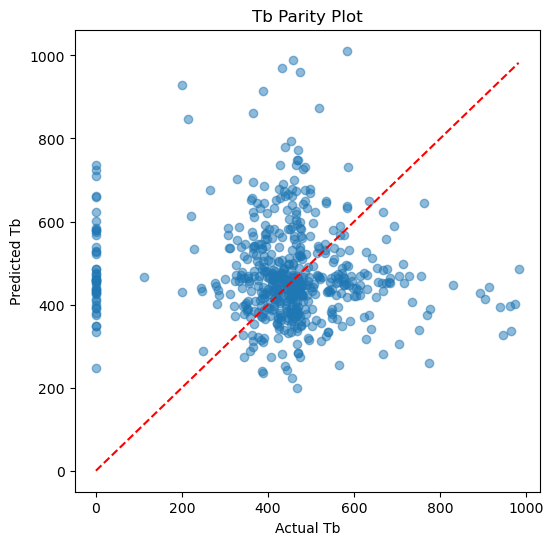

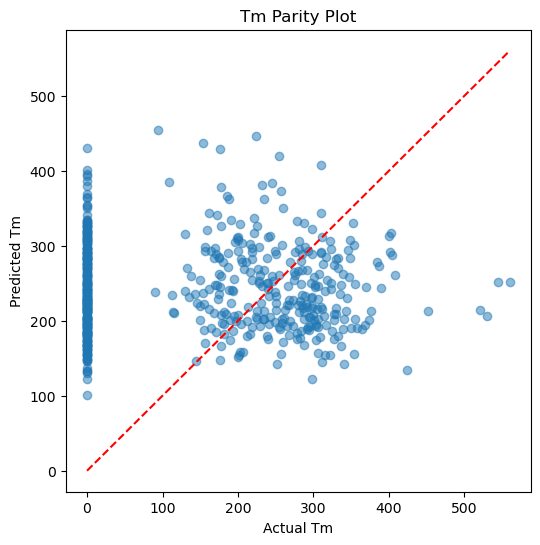

In [42]:
import matplotlib.pyplot as plt

# Tb Comparison Plot
plt.figure(figsize=(6,6))
plt.scatter(test_actuals["Tb mean (K)"], predictions["Tb mean (K)"], alpha=0.5)
plt.plot([min(test_actuals["Tb mean (K)"]), max(test_actuals["Tb mean (K)"])], [min(test_actuals["Tb mean (K)"]), max(test_actuals["Tb mean (K)"])], color="red", linestyle="--")
plt.xlabel("Actual Tb")
plt.ylabel("Predicted Tb")
plt.title("Tb Parity Plot")
plt.show()

# Tm Comparison Plot
plt.figure(figsize=(6,6))
plt.scatter(test_actuals["Tm mean (K)"], predictions["Tm mean (K)"], alpha=0.5)
plt.plot([min(test_actuals["Tm mean (K)"]), max(test_actuals["Tm mean (K)"])], [min(test_actuals["Tm mean (K)"]), max(test_actuals["Tm mean (K)"])], color="red", linestyle="--")
plt.xlabel("Actual Tm")
plt.ylabel("Predicted Tm")
plt.title("Tm Parity Plot")
plt.show()
